In [1]:
import pandas as pd


yearly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\yearly_deaths_by_clinic.csv")

print(yearly)


    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [3]:
import pandas as pd


yearly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\yearly_deaths_by_clinic.csv")


yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]


yearly1 = yearly[yearly["clinic"] == 1]


yearly2 = yearly[yearly["clinic"] == 2]


print(yearly1)


Empty DataFrame
Columns: [year, births, deaths, clinic, proportion_deaths]
Index: []


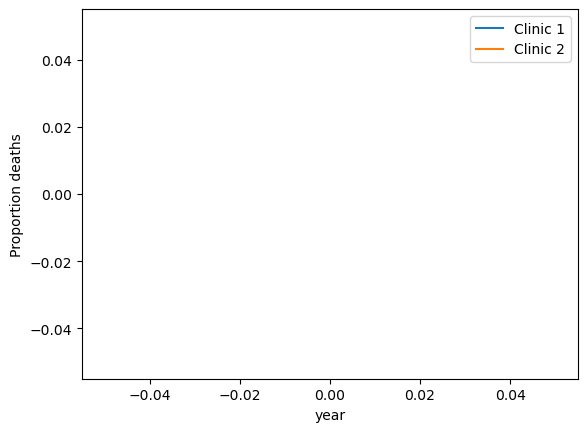

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


yearly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\yearly_deaths_by_clinic.csv")


yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]


ax = yearly[yearly["clinic"] == 1].plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly[yearly["clinic"] == 2].plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)


ax.set_ylabel("Proportion deaths")


plt.show()


In [6]:
import pandas as pd

monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


print(monthly.head())


        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


ax = monthly[monthly["clinic"] == 1].plot(x="date", y="proportion_deaths")


ax.set_ylabel("Proportion deaths")


plt.show()


KeyError: 'clinic'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


ax = monthly[monthly["clinic"] == 1].plot(x="date", y="proportion_deaths")


ax.set_ylabel("Proportion deaths")


plt.show()


KeyError: 'clinic'

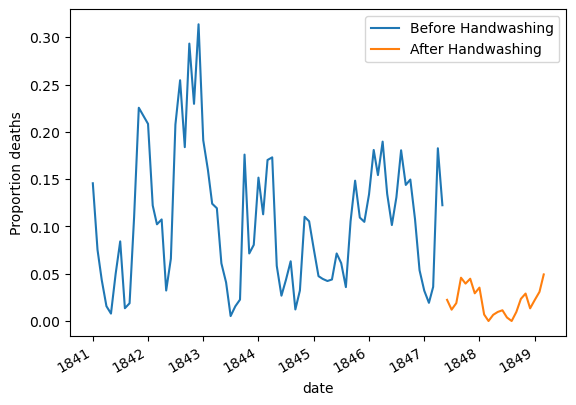

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


handwashing_start = pd.to_datetime('1847-06-01')


before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

ax = before_washing.plot(x="date", y="proportion_deaths", label="Before Handwashing")
after_washing.plot(x="date", y="proportion_deaths", label="After Handwashing", ax=ax)


ax.set_ylabel("Proportion deaths")


plt.show()


In [14]:
import pandas as pd


monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


handwashing_start = pd.to_datetime('1847-06-01')


before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]


before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]


reduction_in_proportion = after_proportion.mean() - before_proportion.mean()


print("Average reduction in proportion of deaths: {:.2f}".format(reduction_in_proportion))


Average reduction in proportion of deaths: -0.08


In [15]:
import pandas as pd
import numpy as np


monthly = pd.read_csv(r"C:\Users\User\Downloads\datasets\datasets\monthly_deaths.csv", parse_dates=["date"])


monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]


handwashing_start = pd.to_datetime('1847-06-01')


before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]


before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]


boot_mean_diff = []
np.random.seed(0) 
for _ in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())


confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])


print("95% Confidence Interval: {:.4f} - {:.4f}".format(confidence_interval[0.025], confidence_interval[0.975]))


95% Confidence Interval: -0.1012 - -0.0666
